# Creating the exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Reading the data

In [2]:
wine = pd.read_csv('../data/raw/winemag-data-130k-v2.csv')
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Explore the dataset

Getting a basic description of the data.


In [3]:
wine.describe(include ='all', ).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,129971,NaN,NaN,NaN,64985,37519.5,0,32492.5,64985,97477.5,129970
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Cigar box, café au lait, and dried tobacco aro...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Grouping per country and points to analyse the mean price of the wines

In [4]:
cnt = wine.groupby(['country','points'])['price'].agg(['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='PuBu',high=0.5)

,country,points,count,min,max,mean
0,Germany,98,1,775,775,775
1,France,100,8,150,1500,685.375
2,Australia,99,2,300,850,575
3,Portugal,100,2,450,650,550
4,France,99,3,159,800,506.333
5,Germany,97,7,245,775,464.714
6,Spain,98,1,450,450,450
7,France,98,14,70,1900,449.429
8,Italy,100,4,210,550,372.5
9,France,97,50,45,2000,363.38


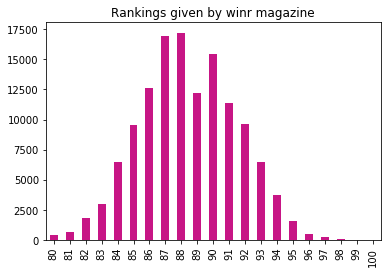

In [5]:
wine['points'].value_counts().sort_index().plot.bar(color = 'mediumvioletred',
                                                   title = 'Rankings given by winr magazine');

# Exploring the wine representation per country

How many countries are represented?

In [6]:
wine['country'].nunique()

43

Countries with the most wine representations

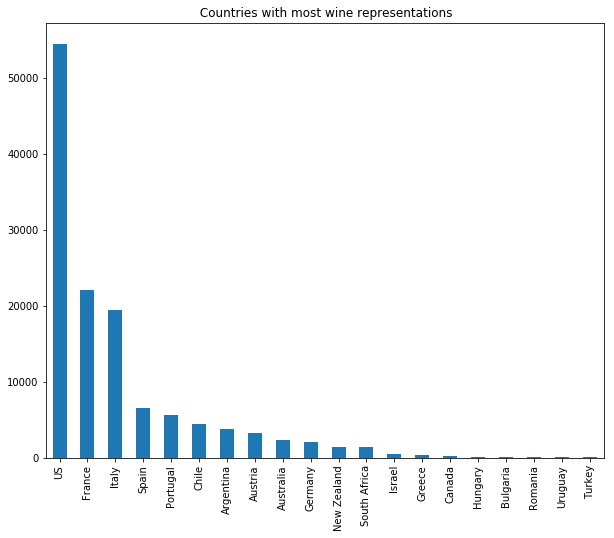

In [7]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (10, 8))
country = wine['country'].value_counts().to_frame()[0:20]
country.plot.bar(ax = ax, legend = None, title = ' Countries with most wine representations');


Which countries have the highest point mean?

In [8]:
country_grouped = wine.groupby('country')
grouped_list = country_grouped['points'].mean().reset_index()
grouped_list.sort_values(by ='points', ascending = False).iloc[:20].reset_index(drop = True)

,country,points
0,England,91.581081
1,India,90.222222
2,Austria,90.101345
3,Germany,89.851732
4,Canada,89.369650
5,Hungary,89.191781
6,China,89.000000
7,France,88.845109
8,Luxembourg,88.666667
9,Australia,88.580507


## Getting only the wines produced by Chile

In [9]:
chile = wine[wine['country'] == 'Chile'].copy()
chile.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
36,36,Chile,"White flower, lychee and apple aromas carry th...",Estate,86,15.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Estampa 2011 Estate Viognier-Chardonnay (Colch...,Viognier-Chardonnay,Estampa
44,44,Chile,A berry aroma comes with cola and herb notes. ...,NaN,86,9.0,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Sundance 2011 Merlot (Maule Valley),Merlot,Sundance
51,51,Chile,This is much different than Casa Silva's 2009 ...,Gran Reserva,85,22.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Casa Silva 2008 Gran Reserva Petit Verdot (Col...,Petit Verdot,Casa Silva
58,58,Chile,Lightly herbal strawberry and raspberry aromas...,Reserve,85,13.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
80,80,Chile,Caramelized oak and vanilla aromas are front a...,Special Release Reserva,86,12.0,Rapel Valley,NaN,NaN,Michael Schachner,@wineschach,Aresti 2014 Special Release Reserva Carmenère ...,Carmenère,Aresti


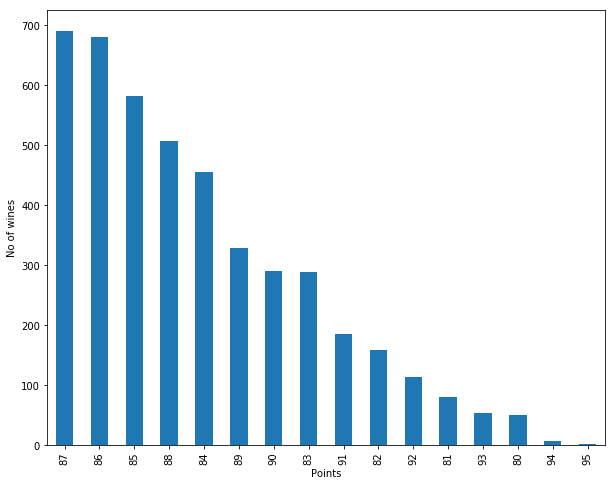

In [10]:
fig, ax = plt.subplots(figsize = (10, 8))
chile_points = chile['points'].value_counts().to_frame()
chile_points.sort_values(by = 'points', ascending = False, inplace = True)
chile_points.plot.bar(ax = ax, legend = None)
ax.set_xlabel('Points')
ax.set_ylabel('No of wines');